In [ ]:
from datasets import load_dataset

dataset = load_dataset("AzharAli05/Resume-Screening-Dataset")

dataset.save_to_disk("Dataset/Resume_screening_dataset")


In [50]:

import pandas as pd

df = pd.read_parquet(
    path="Dataset/resume-screening-dataset.parquet"
)

df['Decision'].unique()

array(['reject', 'select'], dtype=object)

In [51]:
df.head()

,Role,Resume,Decision,Reason_for_decision,Job_Description
0,E-commerce Specialist,Here's a professional resume for Jason Jones:\...,reject,Lacked leadership skills for a senior position.,Be part of a passionate team at the forefront ...
1,Game Developer,Here's a professional resume for Ann Marshall:...,select,Strong technical skills in AI and ML.,Help us build the next-generation products as ...
2,Human Resources Specialist,Here's a professional resume for Patrick Mccla...,reject,Insufficient system design expertise for senio...,We need a Human Resources Specialist to enhanc...
3,E-commerce Specialist,Here's a professional resume for Patricia Gray...,select,Impressive leadership and communication abilit...,Be part of a passionate team at the forefront ...
4,E-commerce Specialist,Here's a professional resume for Amanda Gross:...,reject,Lacked leadership skills for a senior position.,We are looking for an experienced E-commerce S...


In [52]:
# Take only relevant columns 'Decision -> target' , 'Resume' , 'Job_Description'

df = df[['Resume' , 'Decision' , 'Job_Description']]

df.head()

,Resume,Decision,Job_Description
0,Here's a professional resume for Jason Jones:\...,reject,Be part of a passionate team at the forefront ...
1,Here's a professional resume for Ann Marshall:...,select,Help us build the next-generation products as ...
2,Here's a professional resume for Patrick Mccla...,reject,We need a Human Resources Specialist to enhanc...
3,Here's a professional resume for Patricia Gray...,select,Be part of a passionate team at the forefront ...
4,Here's a professional resume for Amanda Gross:...,reject,We are looking for an experienced E-commerce S...


In [53]:
# import nltk
# nltk.download('all')

In [54]:



import string
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS

lemmatizer = WordNetLemmatizer()

punctuations = string.punctuation
translator = str.maketrans('', '', string.punctuation)

def preprocess_text(text :str):
    text = text.lower()    

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)

    # Remove punctuations
    text = text.translate(translator)

    # Tokenize the sentence
    tokenized_words = word_tokenize(text)


    cleaned_words = [lemmatizer.lemmatize(word) for word in tokenized_words if word not in STOPWORDS]


    return ' '.join(cleaned_words)


df[['Resume', 'Job_Description']] = df[['Resume', 'Job_Description']].map(preprocess_text)


df['Decision'] = df['Decision'].apply(lambda x : str(x).lower())

In [55]:
# Remove the most frequent words

from collections import Counter




resume_words = []
job_description_words = []

for resume_sentence , job_description_sentence in zip(df['Resume'] , df['Job_Description']):

    resume_words.extend(word_tokenize(resume_sentence))
    job_description_words.extend(word_tokenize(job_description_sentence))


resume_common_words = Counter(resume_words).most_common(n=10)
job_description_common_words = Counter(job_description_words).most_common(n=10)


def remove_common_words(text, common_words):
    # Tokenize the text and remove common words
    tokenized_words = word_tokenize(text.lower())
    cleaned_words = [word for word in tokenized_words if word not in common_words and word.isalpha()]
    return ' '.join(cleaned_words)


df['Resume'] = df['Resume'].apply(lambda x: remove_common_words(x, resume_common_words))
df['Job_Description'] = df['Job_Description'].apply(lambda x: remove_common_words(x, job_description_common_words))

In [56]:
# Convert the target column decision to numbers 


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Decision'] = label_encoder.fit_transform(df['Decision'])

print(df[['Decision']].head())  # Check the encoded labels


   Decision
0         0
1         1
2         0
3         1
4         0


In [57]:
df.head()

,Resume,Decision,Job_Description
0,here professional resume jason jones jason jon...,0,part passionate team forefront machine learnin...
1,here professional resume ann marshall ann mars...,1,help u build nextgeneration product game devel...
2,here professional resume patrick mcclain patri...,0,need human resource specialist enhance team te...
3,here professional resume patricia gray patrici...,1,part passionate team forefront cloud computing...
4,here professional resume amanda gross amanda g...,0,looking experienced ecommerce specialist join ...


In [58]:
# Replace specific words (case-insensitive, whole words only)
words_to_remove = ["here", "professional", "resume"]

# Create regex pattern: \b(word1|word2|word3)\b
pattern = r'\b(' + '|'.join(words_to_remove) + r')\b'

df['Resume'] = df['Resume'].str.replace(pattern, '', regex=True, case=False)

# Optional: clean up extra spaces
df['Resume'] = df['Resume'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [59]:
df.head()

,Resume,Decision,Job_Description
0,jason jones jason jones ecommerce specialist c...,0,part passionate team forefront machine learnin...
1,ann marshall ann marshall contact information ...,1,help u build nextgeneration product game devel...
2,patrick mcclain patrick mcclain human resource...,0,need human resource specialist enhance team te...
3,patricia gray patricia gray contact informatio...,1,part passionate team forefront cloud computing...
4,amanda gross amanda gross contact information ...,0,looking experienced ecommerce specialist join ...


In [60]:
cleaned_df=df.copy()

In [61]:
cleaned_df.to_csv("Dataset/cleaned_resume_screening.csv" , index=False)

In [62]:
import pandas as pd

cleaned_df = pd.read_csv("Dataset/cleaned_resume_screening.csv")

In [63]:
cleaned_df['combined_text'] = cleaned_df['Resume'] + cleaned_df['Job_Description']

cleaned_df.head()

,Resume,Decision,Job_Description,combined_text
0,jason jones jason jones ecommerce specialist c...,0,part passionate team forefront machine learnin...,jason jones jason jones ecommerce specialist c...
1,ann marshall ann marshall contact information ...,1,help u build nextgeneration product game devel...,ann marshall ann marshall contact information ...
2,patrick mcclain patrick mcclain human resource...,0,need human resource specialist enhance team te...,patrick mcclain patrick mcclain human resource...
3,patricia gray patricia gray contact informatio...,1,part passionate team forefront cloud computing...,patricia gray patricia gray contact informatio...
4,amanda gross amanda gross contact information ...,0,looking experienced ecommerce specialist join ...,amanda gross amanda gross contact information ...


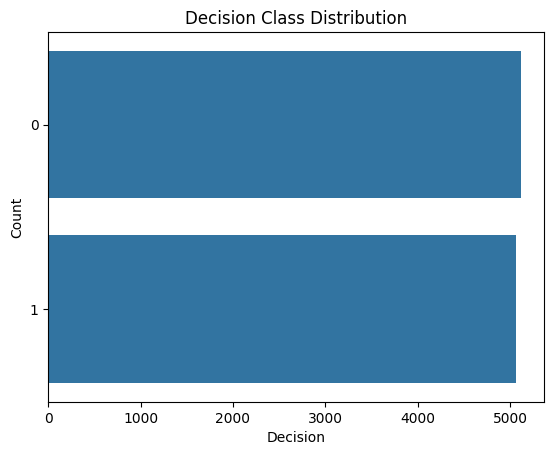

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y='Decision', data=cleaned_df)
plt.title('Decision Class Distribution')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()

In [65]:
from sklearn.model_selection import train_test_split


X = cleaned_df['combined_text']
y = cleaned_df['Decision']



X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.3)


print(X_train.shape)
print(y_train.shape)

(7121,)
(7121,)


In [66]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(
    max_features=10000,
    strip_accents="unicode", # Strips accents like é -> e
)


X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)


sgd_classifier = SGDClassifier(
    loss='log_loss',  # Logistic regression (log loss)
    penalty='l2',  # Regularization
    max_iter=1000,  # Max number of iterations
    tol=1e-3,  # Stopping criterion
    random_state=42,
)

sgd_classifier.partial_fit(X_train_vectors, y_train, classes=y.unique())  # Initial fit on the training data

y_pred = sgd_classifier.predict(X_test_vectors)


In [67]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()

X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)


rfc.fit(X_train_vectors , y_train)


rfc.score(X_test_vectors , y_test)


0.5643629217163446

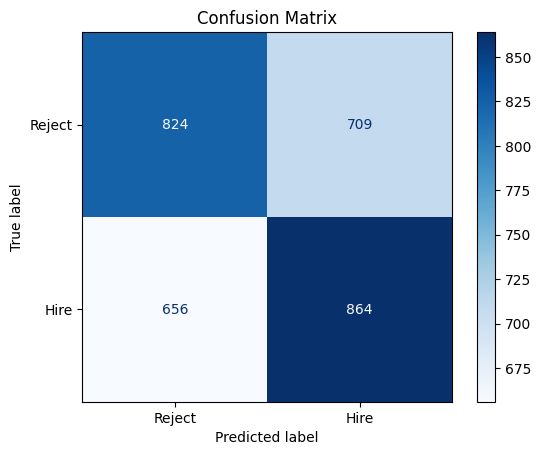

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Reject', 'Hire'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

ROC-AUC Score: 0.5983


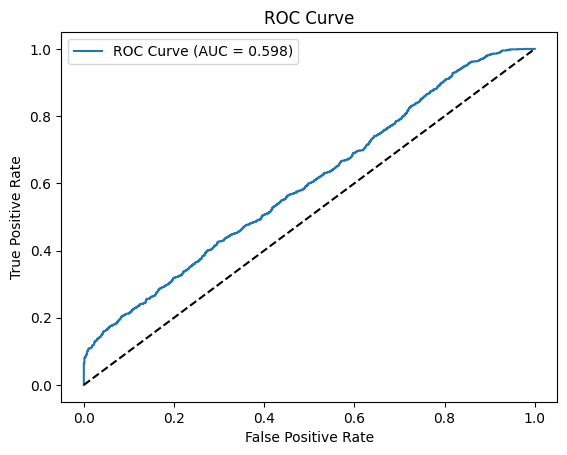

In [69]:
from sklearn.metrics import roc_auc_score, roc_curve

# For binary classification
y_prob = sgd_classifier.predict_proba(X_test_vectors)[:, 1]  # Probability of "Hire"
auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:

import pickle

# -------------------------------

model_data = {
    'vectorizer': vectorizer,
    'classifier': sgd_classifier
}

with open('resume_screening_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("Model and vectorizer saved to 'resume_screening_model.pkl'")

# -------------------------------
# 4. UNPICKLE (LOAD) AND INFERENCE
# -------------------------------
# Simulate loading in a new session
with open('resume_screening_model.pkl', 'rb') as f:
    loaded = pickle.load(f)

vectorizer = loaded['vectorizer']
classifier = loaded['classifier']

print("Model and vectorizer loaded successfully!")



Model and vectorizer saved to 'resume_screening_model.pkl'
Model and vectorizer loaded successfully!


In [71]:
def predict_hiring_decision(resume_text, job_description):
    # Combine
    combined_text = resume_text + " " + job_description
    combined_text = combined_text.strip()

    # Vectorize
    text_vector = vectorizer.transform([combined_text])

    # Predict
    prediction = classifier.predict(text_vector)[0]
    probability = classifier.predict_proba(text_vector)[0]

    decision = "Hire" if prediction == 1 else "Reject"
    prob_hire = probability[1] if prediction == 1 else probability[0]

    return {
        'Decision': decision,
        'Probability (Hire)': round(probability[1], 4),
        'Confidence': round(max(probability), 4)
    }

sample_idx = 0
sample_resume = df['Resume'].iloc[X_test.index[sample_idx]]
sample_job = df['Job_Description'].iloc[X_test.index[sample_idx]]
true_label = y_test.iloc[sample_idx]

print("\n" + "="*50)
print("INFERENCE EXAMPLE")
print("="*50)
print(f"True Label: {true_label} ({'Hire' if true_label == 1 else 'Reject'})")
print(f"Resume snippet: {sample_resume[:100]}...")
print(f"Job Desc snippet: {sample_job[:100]}...")

result = predict_hiring_decision(sample_resume, sample_job)
print("\nModel Prediction:")
for k, v in result.items():
    print(f"  {k}: {v}")


INFERENCE EXAMPLE
True Label: 0 (Reject)
Resume snippet: sample stephanie cohen data analyst candidate stephanie cohen contact information email stephaniecoh...
Job Desc snippet: take lead driving innovation data analyst collaborative environment focused excellence software engi...

Model Prediction:
  Decision: Reject
  Probability (Hire): 0.3788
  Confidence: 0.6212
